In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, TimeDistributed, Activation, LSTM
from keras.utils import np_utils

import os

# brew install graphviz
# pip3 install graphviz
# pip3 install pydot-ng
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
#sample text
sample = "hihello"

In [3]:
char_set = list(set(sample))  # id -> char ['i', 'l', 'e', 'o', 'h']
char_dic = {w: i for i, w in enumerate(char_set)}
print(char_dic)

{'h': 0, 'i': 1, 'o': 2, 'l': 3, 'e': 4}


In [4]:
x_str = sample[:-1]
y_str = sample[1:]

In [5]:
data_dim = len(char_set)
timesteps = len(y_str)
num_classes = len(char_set)
print(x_str, y_str)

hihell ihello


In [6]:
x = [char_dic[c] for c in x_str]  # char to index
y = [char_dic[c] for c in y_str]  # char to index
print(x)
print(y)

[0, 1, 0, 4, 3, 3]
[1, 0, 4, 3, 3, 2]


In [7]:
# One-hot encoding
x = np_utils.to_categorical(x, num_classes=num_classes)
# reshape X to be [samples, time steps, features]
x = np.reshape(x, (-1, len(x), data_dim))
print(x.shape)
print(x[0])

(1, 6, 5)
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


In [8]:
# One-hot encoding
y = np_utils.to_categorical(y, num_classes=num_classes)
# time steps
y = np.reshape(y, (-1, len(y), data_dim))
print(y.shape)

(1, 6, 5)


In [9]:
model = Sequential()
model.add(LSTM(num_classes*128, input_shape=(timesteps, data_dim), return_sequences=True))
model.add(LSTM(num_classes*64, return_sequences=True))
model.add(LSTM(num_classes*16, return_sequences=True))
model.add(LSTM(num_classes*4, return_sequences=True))
model.add(TimeDistributed(Dense(num_classes)))
model.add(Activation('softmax')) 
model.summary()
# Store model graph in png
# (Error occurs on in python interactive shell)
#plot_model(model, to_file=os.path.basename(__file__) + '.png', show_shapes=True)

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])

W0315 12:36:39.647082 12900 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0315 12:36:39.707989 12900 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0315 12:36:39.728256 12900 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0315 12:37:00.408103 12900 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6, 640)            1653760   
_________________________________________________________________
lstm_2 (LSTM)                (None, 6, 320)            1230080   
_________________________________________________________________
lstm_3 (LSTM)                (None, 6, 80)             128320    
_________________________________________________________________
lstm_4 (LSTM)                (None, 6, 20)             8080      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 6, 5)              105       
_________________________________________________________________
activation_1 (Activation)    (None, 6, 5)              0         
Total params: 3,020,345
Trainable params: 3,020,345
Non-trainable params: 0
____________________________________________

W0315 12:37:00.574806 12900 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
history = model.fit(x, y, epochs=200, verbose=1)

W0315 12:37:02.669776 12900 deprecation.py:323] From C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0315 12:37:47.410279 12900 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/200
1/1 [==============================] - 38s 38s/step - loss: 1.6094 - acc: 0.1667
Epoch 2/200
1/1 [==============================] - 0s 302ms/step - loss: 1.5771 - acc: 0.3333
Epoch 3/200
1/1 [==============================] - 0s 318ms/step - loss: 1.4826 - acc: 0.3333
Epoch 4/200
1/1 [==============================] - 0s 259ms/step - loss: 1.3615 - acc: 0.3333
Epoch 5/200
1/1 [==============================] - 0s 373ms/step - loss: 1.2802 - acc: 0.3333
Epoch 6/200
1/1 [==============================] - 0s 276ms/step - loss: 1.3315 - acc: 0.1667
Epoch 7/200
1/1 [==============================] - 0s 280ms/step - loss: 1.2598 - acc: 0.3333
Epoch 8/200
1/1 [==============================] - 0s 238ms/step - loss: 1.2374 - acc: 0.3333
Epoch 9/200
1/1 [==============================] - 0s 239ms/step - loss: 1.1703 - acc: 0.3333
Epoch 10/200
1/1 [==============================] - 0s 216ms/step - loss: 1.1535 - acc: 0.3333
Epoch 11/200
1/1 [==============================] - 0s 297ms

Epoch 88/200
1/1 [==============================] - 0s 265ms/step - loss: 0.6495 - acc: 0.6667
Epoch 89/200
1/1 [==============================] - 0s 277ms/step - loss: 1.1874 - acc: 0.5000
Epoch 90/200
1/1 [==============================] - 0s 263ms/step - loss: 0.4766 - acc: 0.8333
Epoch 91/200
1/1 [==============================] - 0s 280ms/step - loss: 0.4552 - acc: 0.8333
Epoch 92/200
1/1 [==============================] - 0s 277ms/step - loss: 0.4454 - acc: 0.8333
Epoch 93/200
1/1 [==============================] - 0s 291ms/step - loss: 0.4373 - acc: 0.8333
Epoch 94/200
1/1 [==============================] - 0s 238ms/step - loss: 0.4306 - acc: 0.8333
Epoch 95/200
1/1 [==============================] - 0s 203ms/step - loss: 0.4242 - acc: 0.8333
Epoch 96/200
1/1 [==============================] - 0s 288ms/step - loss: 0.4182 - acc: 0.8333
Epoch 97/200
1/1 [==============================] - 0s 331ms/step - loss: 0.4122 - acc: 0.8333
Epoch 98/200
1/1 [==============================] 

Epoch 174/200
1/1 [==============================] - 0s 276ms/step - loss: 0.0760 - acc: 1.0000
Epoch 175/200
1/1 [==============================] - 0s 239ms/step - loss: 0.0727 - acc: 1.0000
Epoch 176/200
1/1 [==============================] - 0s 286ms/step - loss: 0.0709 - acc: 1.0000
Epoch 177/200
1/1 [==============================] - 0s 255ms/step - loss: 0.0668 - acc: 1.0000
Epoch 178/200
1/1 [==============================] - 0s 199ms/step - loss: 0.0641 - acc: 1.0000
Epoch 179/200
1/1 [==============================] - 0s 237ms/step - loss: 0.0618 - acc: 1.0000
Epoch 180/200
1/1 [==============================] - 0s 243ms/step - loss: 0.0599 - acc: 1.0000
Epoch 181/200
1/1 [==============================] - 0s 276ms/step - loss: 0.0580 - acc: 1.0000
Epoch 182/200
1/1 [==============================] - 0s 277ms/step - loss: 0.0567 - acc: 1.0000
Epoch 183/200
1/1 [==============================] - 0s 261ms/step - loss: 0.0550 - acc: 1.0000
Epoch 184/200
1/1 [=====================

In [11]:
predictions = model.predict(x, verbose=0)
for i, prediction in enumerate(predictions):
    print(prediction)
    x_index = np.argmax(x[i], axis=1)
    x_str = [char_set[j] for j in x_index]
    print(x_index, ''.join(x_str))

    index = np.argmax(prediction, axis=1)
    result = [char_set[j] for j in index]
    print(index, ''.join(result))

[[4.07494605e-02 9.35697973e-01 1.05218897e-02 6.29020063e-03
  6.74052723e-03]
 [9.34164464e-01 3.42777111e-02 1.10327522e-03 1.03380634e-02
  2.01165434e-02]
 [1.17010595e-02 2.78588734e-03 1.66766637e-03 1.71932206e-02
  9.66652095e-01]
 [3.83159984e-03 6.82905375e-04 1.81690382e-03 9.87014771e-01
  6.65391376e-03]
 [2.92094029e-03 3.13369324e-04 1.99257433e-02 9.73216534e-01
  3.62343714e-03]
 [1.90148910e-03 2.18824600e-03 9.64278281e-01 2.91795060e-02
  2.45249947e-03]]
[0 1 0 4 3 3] hihell
[1 0 4 3 3 2] ihello


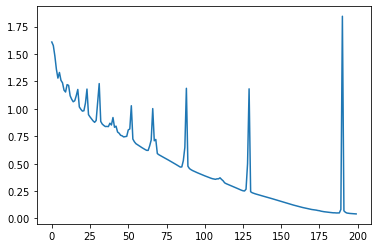

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()